# Artifact channels identification from an HD-EMG array

Nicolly Kobayashi  
Renato Watanabe



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install hickle
import hickle
!pip install --upgrade numpy
import h5py

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 49 kB 837 kB/s 
     |████████████████████████████████| 2.9 MB 2.0 MB/s 
  Attempting uninstall: h5py
    Found existing installation: h5py 3.1.0
    Uninstalling h5py-3.1.0:
      Successfully uninstalled h5py-3.1.0
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from scipy import signal
import matplotlib.pyplot as plt
from matplotlib import pylab
from google.colab import widgets
import numpy as np
from scipy.interpolate import LinearNDInterpolator
from scipy.spatial import Delaunay
import pandas as pd

2.5816827522664307 458.56742381118204
2.5816827522664307 [0] [43720]


(0.0, 100.0)

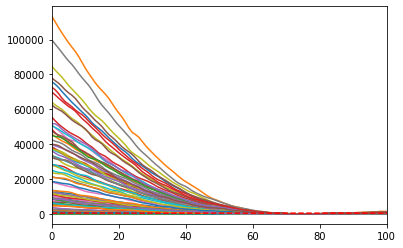

In [ ]:
dados01 = h5py.File("/content/drive/MyDrive/dicionario/Dicionário/dados01.h5", "r+")
j = 29
env = pd.DataFrame((dados01['/'+str(j) +'/emg'][:,:]**2).T).rolling(window= 2048, min_periods= 0, center= True).mean().fillna(0).values.mean(axis=1)
ref = np.mean(env[np.argmin(env)-50:np.argmin(env)+50])
print(ref, env.max())
if np.sum((env>20*ref)) > 204:
    start = np.argwhere((env>3*ref))[0]
    end = np.argwhere((env>3*ref))[-1]
    print(ref,start, end)
plt.plot((dados01['/'+str(j) + '/emg'][()][0:126,:]**2).T)
plt.plot(env,'r--');
plt.xlim(0,100)

In [ ]:
print(np.sum(env > 3*ref))
len(env)

33895


43721

## EMG signals spectra examples from subject 01, movement thumbAdd,  



## Artifact signals identification

Power Spectra and signal power (from RMS) for each channel.

The power spectra are computed using the Welch method using windows of 500 ms with no overlap.

In [ ]:
fs = 2048
nperseg = 1024
mlen = nperseg//2+1

matriz_p = dict()
matriz_rms = dict()



for subj in range(1,26):
    print(subj)
    dados01 = h5py.File("/content/drive/MyDrive/dicionario/Dicionário/dados"+ str(subj).zfill(2) +".h5", "r+")
    for j in range(len(dados01)):
        
        movement = dados01['/'+str(j)+'/movement'][()][0]
        speed = dados01['/'+str(j)+'/speed'][()][0]
        session = dados01['/'+str(j)+'/session'][()][0][0]
        if (dados01['/'+str(j) + '/emg'][()][:126, 0:100]**2).max()> 10*(dados01['/'+str(j) + '/emg'][()][:126, :]**2).std(axis=1).mean():
            refstart = (dados01['/'+str(j) + '/emg'][()][:126, :]**2).mean(axis=0).argmin()
        else:
            refstart=0
        ref = (dados01['/'+str(j) + '/emg'][()][:126, refstart:refstart+100]**2).std(axis=1).mean()
        if np.sum((dados01['/'+str(j) + '/emg'][()][:126,:]**2).mean(axis=0)>20*ref) > 204:
            print(j)
            start = np.argwhere((dados01['/'+str(j)+'/emg'][()][:126,:]**2).mean(axis=0)>20*ref)[0][0]
            end = np.argwhere((dados01['/'+str(j)+'/emg'][()][:126,:]**2).mean(axis=0)>20*ref)[-1][0]
            
            sinal_emg = np.zeros((9,14,end-start))
            for i in range(0,126):
                emg = dados01['/'+str(j)+'/emg'][()][i, start:end]
                
                linha = i % 9 
                coluna = i // 9

                sinal_emg[linha,coluna,:] = emg
            f, matriz_p[subj, movement, speed, session] = signal.welch(sinal_emg, fs=fs, nperseg=nperseg, axis=2, nfft=nperseg)
            matriz_rms[subj, movement, speed, session] = np.mean(sinal_emg**2, axis=2)
            # max = np.argmax(pl)

hickle.dump(matriz_p, 
            "/content/drive/MyDrive/dicionario/matriz_p_cut.h5",
            mode='w')

hickle.dump(matriz_rms, 
            "/content/drive/MyDrive/dicionario/matriz_rms_cut.h5",
            mode='w')

1
1
3
4
5
7
8
12
13
15
18
20
21
24
26
29
30
32
34
35
36
37
41
42
43
47
48
53
55
58
63
65
67
68
69
70
71
72
73
76
77
79
80
82
83
85
86
87
88
89
91
93
94
96
98
99
100
101
104
110
113
114
116
117
120
122
126
128
133
134
135
136
140
141
143
144
146
147
149
150
152
155
157
158
160
162
165
170
171
174
175
178
179
187
189
190
192
193
195
196
198
200
203
205
206
210
211
213
214
218
219
220
221
222
225
227
228
229
230
231
232
233
2
0
1
9
10
11
14
16
17
18
21
22
23
25
26
27
30
31
34
35
36
39
40
44
46
47
49
50
51
52
54
55
58
59
61
63
66
71
72
73
74
76
77
78
79
80
82
83
84
85
86
87
88
90
93
94
96
97
98
100
104
106
110
113
116
117
120
121
122
125
126
127
129
130
133
135
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
164
165
167
168
169
172
173
175
176
177
178
179
180
181
183
184
185
188
189
190
195
196
197
198
199
203
204
210
211
213
214
215
217
219
220
221
223
225
226
227
232
233
3
0
2
3
5
6
7
9
11
12
13
15
17
18
21
23
24
25
26
28
29
31
34
40
44

/usr/local/lib/python3.7/dist-packages/scipy/signal/spectral.py:1966: UserWarning: nperseg = 1024 is greater than input length  = 564, using nperseg = 564
  .format(nperseg, input_length))


156
157
159
160
162
163
178
186
191
195
202
203
204
209
212
214
215
216
218
229
230
231
5
0
1
3
5
6
7
11
13
16
24
26
27
29
30
31
34
36
39
42
44
46
60
62
63
65
67
70
75
77
79
83
85
87
98
99
104
105
106
108
109
110
111
116
118
131
132
133
138
141
142
145
147
153
154
164
166
168
170
172
174
175
176
178
181
182
188
193
194
197
199
201
202
205
210
215
217
221
223
224
225
226
228
231
232
6
2
3
4
5
6
7
8
9
10
11
12
14
16
17
18
20
21
22
23
24
25
26
28
30
31
32
33
34
37
43
45
49
52
53
54
55
57
59
60
62
63
64
65
66
68
69
70
71
72
73
75
81
84
85
87
88
91
92
93
95
96
99
100
101
102
103
104
105
106
107
108
109
110
112
113
115
118
120
121
122
124
125
126
128
129
131
132
133
135
140
141
144
148
154
157
160
162
164
166
167
169
170
171
172
173
174
175
176
178
179
180
182
183
184
185
188
192
194
195
196
197
200
201
203
205
210
211
215
216
218
221
222
224
225
227
228
7
17
18
20
21
23
37
38
39
82
95
97
100
102
103
106
119
123
124
125
127
128
135
137
144
145
151
157
158
159
160
162
165
166
167
168
188
196


/usr/local/lib/python3.7/dist-packages/scipy/signal/spectral.py:1966: UserWarning: nperseg = 1024 is greater than input length  = 304, using nperseg = 304
  .format(nperseg, input_length))


52
54
60
63
80
87
92
96
99
100
103
104
106
108
121
126
128
133
139
142
145
157
160
161
163
166
169
174
183
185
186
188
202
205
206
211
212
214
215
216
15
18
20
24
29
32
33
41
43
44
45
46


/usr/local/lib/python3.7/dist-packages/scipy/signal/spectral.py:1966: UserWarning: nperseg = 1024 is greater than input length  = 264, using nperseg = 264
  .format(nperseg, input_length))


47
51
52
54
55
60
65
66
67
71
72
73
84
87
90
94
96
98
99
102
105
110
114
115
126
127
128
129
132
135
145
146
153
158
159
162
164
166
168
171
172
174
188
191
196
197
201
206
207
212
217
219
221
225
233
16
0
17
18
53
64
76
91
103
125
141
162
176
184
187
188
189
201
17
0
2
3
4
5
6
7
8
9
10
11
13
14
18
19
20
24
28
29
31
32
33
34
35
36
37
40
43
44
49
50
53
54
55
57
62
64
65
66
67
68
70
71
75
76
77
78
80
81
82
83
84
85
86
87
88
92
94
95
96
98
100
101
102
103
104
105
106
115
117
122
123
124
126
127
131
132
133
134
135
137
139
140
141
142
145
146
147
148
149
152
153
154
156
157
159
160
162
164
165
166
167
169
170
171
172
174
175
176
177
178
179
182
183
184
187
190
191
192
193
194
195
197
198
199
201
202
203
205
206
207
208
209
211
212
213
214
215
216
217
218
220
228
230
231
232
18
0
1
2
3
4
6
8
9
10
11
13
14
15
18
19
20
23
25
26
28
30
33
34
35
36
37
39
41
42
44
45
48
50
57
58
60
61
62
63
64
65
67
68
70
71
72
73
74
75
76
77
78
79
80
81
83
85
88
91
93
96
97
98
102
104
105
106
107
108
109
110
111

In [ ]:
dados01['/'+str(j)+''].keys()

<KeysViewHDF5 ['__globals__', '__header__', '__version__', 'channels_emg', 'channels_glove', 'date', 'emg', 'fs_emg', 'fs_glove', 'glove', 'movement', 'session', 'speed', 'subject']>